In [33]:
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER,
    NamesExtractor,
    DatesExtractor,
    MoneyExtractor,
    AddrExtractor,

    Doc
)

In [27]:
data = {
    'link': ['http://kremlin.ru/events/president/transcripts/messages/62582',
             'http://kremlin.ru/events/president/transcripts/messages/59863',
             'http://kremlin.ru/events/president/transcripts/messages/56957',
             'http://kremlin.ru/events/president/transcripts/messages/53379',
             'http://kremlin.ru/events/president/transcripts/messages/50864',
             'http://kremlin.ru/events/president/transcripts/messages/47173',
             'http://kremlin.ru/events/president/transcripts/messages/19825',
             'http://kremlin.ru/events/president/transcripts/messages/17118',
             'http://kremlin.ru/events/president/transcripts/messages/14088',
             'http://kremlin.ru/events/president/transcripts/messages/9637',
             'http://kremlin.ru/events/president/transcripts/messages/5979',
             'http://kremlin.ru/events/president/transcripts/messages/1968'],
    'year': [2020, 2019, 2018, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008]
}

In [28]:
data = pd.DataFrame(data)

In [29]:
files =  []
for i in data['link']:
    files.append(i.split('/')[-1] + '.txt')
data['file'] = files

In [30]:
data

,link,year,file
0,http://kremlin.ru/events/president/transcripts...,2020,62582.txt
1,http://kremlin.ru/events/president/transcripts...,2019,59863.txt
2,http://kremlin.ru/events/president/transcripts...,2018,56957.txt
3,http://kremlin.ru/events/president/transcripts...,2016,53379.txt
4,http://kremlin.ru/events/president/transcripts...,2015,50864.txt
5,http://kremlin.ru/events/president/transcripts...,2014,47173.txt
6,http://kremlin.ru/events/president/transcripts...,2013,19825.txt
7,http://kremlin.ru/events/president/transcripts...,2012,17118.txt
8,http://kremlin.ru/events/president/transcripts...,2011,14088.txt
9,http://kremlin.ru/events/president/transcripts...,2010,9637.txt


In [31]:
characters_num = []
content_list = []
for file_name in files:
    f=open("..\\dataset\\" + file_name, "r")
    if f.mode == 'r':
        content =f.read()
    content = content.replace('\n\n',' ')
    characters_num.append(len(content))
    content_list.append(content)

In [41]:
data['message'] = content_list

In [42]:
data

,link,year,file,message
0,http://kremlin.ru/events/president/transcripts...,2020,62582.txt,Уважаемые члены Совета Федерации и депутаты Го...
1,http://kremlin.ru/events/president/transcripts...,2019,59863.txt,Уважаемые члены Совета Федерации! Уважаемые де...
2,http://kremlin.ru/events/president/transcripts...,2018,56957.txt,Уважаемые граждане России! Уважаемые члены Сов...
3,http://kremlin.ru/events/president/transcripts...,2016,53379.txt,"Добрый день, уважаемые коллеги! Уважаемые член..."
4,http://kremlin.ru/events/president/transcripts...,2015,50864.txt,Уважаемые члены Совета Федерации! Уважаемые де...
5,http://kremlin.ru/events/president/transcripts...,2014,47173.txt,Уважаемые члены Совета Федерации! Депутаты Гос...
6,http://kremlin.ru/events/president/transcripts...,2013,19825.txt,Уважаемые граждане России! Уважаемые члены Сов...
7,http://kremlin.ru/events/president/transcripts...,2012,17118.txt,Уважаемые граждане России! Уважаемые члены Сов...
8,http://kremlin.ru/events/president/transcripts...,2011,14088.txt,Уважаемые граждане России! Уважаемые депутаты ...
9,http://kremlin.ru/events/president/transcripts...,2010,9637.txt,Уважаемые граждане России! Уважаемые депутаты ...


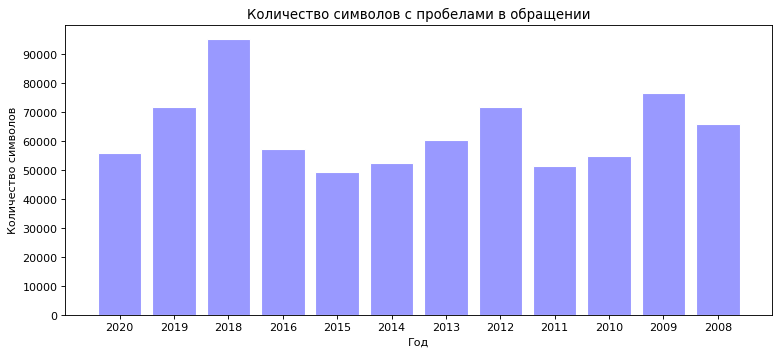

In [32]:
# https://github.com/rougier/matplotlib-tutorial

dpi = 80
fig = plt.figure(dpi = dpi, figsize = (912 / dpi, 384 / dpi) )
mpl.rcParams.update({'font.size': 10})

plt.axis([0, 10, -1.5, 1.5])

plt.title('Количество символов с пробелами в обращении')
plt.xlabel('Год')
plt.ylabel('Количество символов')

X = np.arange(12)
Y = characters_num

plt.bar(X, Y, facecolor='#9999ff', edgecolor='white')
plt.xticks(X, data['year'])

ax = plt.axes()
ax.set_yticks(np.arange(0, 100000, 10000))

plt.xlim(X.min()-1, X.max()+1)
plt.ylim(0, 100000)

plt.show()

fig.savefig('..\\images\\characters_num.png')

In [51]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)
dates_extractor = DatesExtractor(morph_vocab)
money_extractor = MoneyExtractor(morph_vocab)
addr_extractor = AddrExtractor(morph_vocab)

for data_index in range(len(data)):
    message = data['message'][data_index]
    doc = Doc(message)
    
    doc.segment(segmenter)
    
    doc.tag_morph(morph_tagger)
    
    for token in doc.tokens:
        token.lemmatize(morph_vocab)
    
    text = []
    pos = []
    lemma = []
    for i in range(len(doc.tokens)):
        text.append(doc.tokens[i].text)
        pos.append(doc.tokens[i].pos)
        lemma.append(doc.tokens[i].lemma)
    lemma_df = pd.DataFrame()
    lemma_df['text'] = text
    lemma_df['pos'] = pos
    lemma_df['lemma'] = lemma
    
    grouped = lemma_df.groupby('lemma')
    grouped = grouped.count()
    
    grouped_dict = dict(grouped)
    frecuency_lict = []
    for i in range(len(lemma_df)):
        i_lemma = lemma_df['lemma'][i]
        frecuency_lict.append(grouped_dict['text'][i_lemma])
    
    lemma_df['freq'] = frecuency_lict
    
    lemma_df_NOUN = lemma_df[lemma_df['pos']=='NOUN']
    
    print(data['year'][data_index])
    print(lemma_df_NOUN.sort_values(by='freq', ascending=False)[['lemma','freq']].drop_duplicates()[:5])
    print(' ')

2020
        lemma  freq
312       что    90
602       год    66
5259   страна    49
2167  ребенок    43
2118  человек    42
 
2019
         lemma  freq
1902       год    95
5358   человек    55
1238     семья    38
10705   работа    37
670     страна    36
 
2018
          lemma  freq
8580        год   116
14971    страна    65
14618   система    61
9631    человек    57
4758   развитие    55
 
2016
         lemma  freq
699        что    91
5755       год    83
8827  развитие    38
5876    страна    34
2955   человек    31
 
2015
              lemma  freq
2725            год    55
2437        человек    28
4060         страна    24
5443       развитие    21
2525  правительство    18
 
2014
         lemma  freq
2535       что    88
6771       год    61
274    человек    28
3731    страна    24
4183  развитие    23
 
2013
         lemma  freq
5990       год    49
573   развитие    45
4249    работа    42
3186    страна    41
1790   система    35
 
2012
         lemma  freq
9107       чт

In [50]:
data['year'][0]

2020